<h1> IMPORTING LIBRARIES</h1>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns   
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
# from sklearn.datasets import load_diabetes #from sklearn import diabetes dataset
# diabetes_sklearn = load_diabetes() #load the dataset

<h1> LOADING DATASET</h1>

<p> The dataset contains the following columns, with 768 entries each: </p>
<ul>
<li>Pregnancies: Number of pregnancies (integer)</li>
<li>Glucose: Plasma glucose concentration (integer)</li>
<li>BloodPressure: Diastolic blood pressure (mm Hg) (integer)</li>
<li>SkinThickness: Triceps skinfold thickness (mm) (integer)</li>
<li>Insulin: 2-Hour serum insulin (mu U/ml) (integer)</li>
<li>BMI: Body Mass Index (float)</li>
<li>DiabetesPedigreeFunction: Diabetes pedigree function (float)</li>
<li>Age: Age in years (integer)</li>
<li>Outcome: Class variable (0 or 1, where 1 indicates diabetes)</li>
</ul>
There are no missing values in the dataset.

In [4]:
df = pd.read_csv("diabetes.csv")  #load the dataset 
df.head()

,Pregnencies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape #find the number of rows & columns in the dataset 

(768, 9)

In [6]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnencies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe() #describe about dataset

,Pregnencies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h1>MAKING VISUALIZATION</h1>

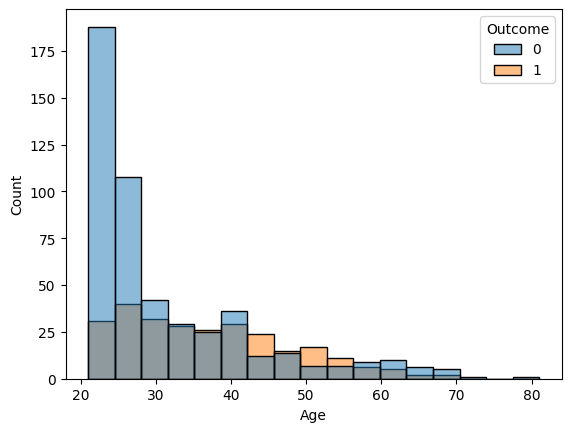

In [8]:
sns.histplot(x='Age',hue='Outcome',data=df)
plt.show()

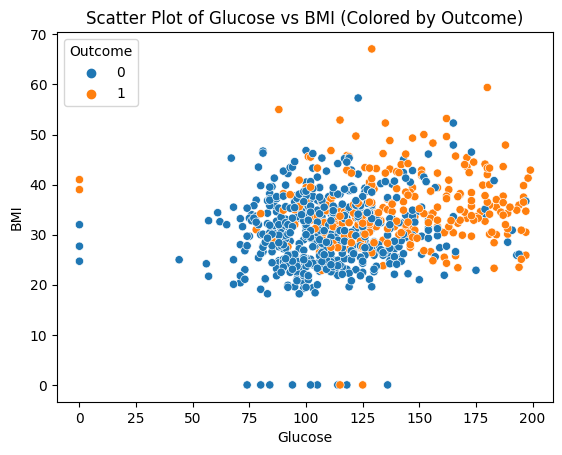

In [9]:
sns.scatterplot(x='Glucose',y='BMI',hue='Outcome',data=df)
plt.title('Scatter Plot of Glucose vs BMI (Colored by Outcome)')
plt.show()

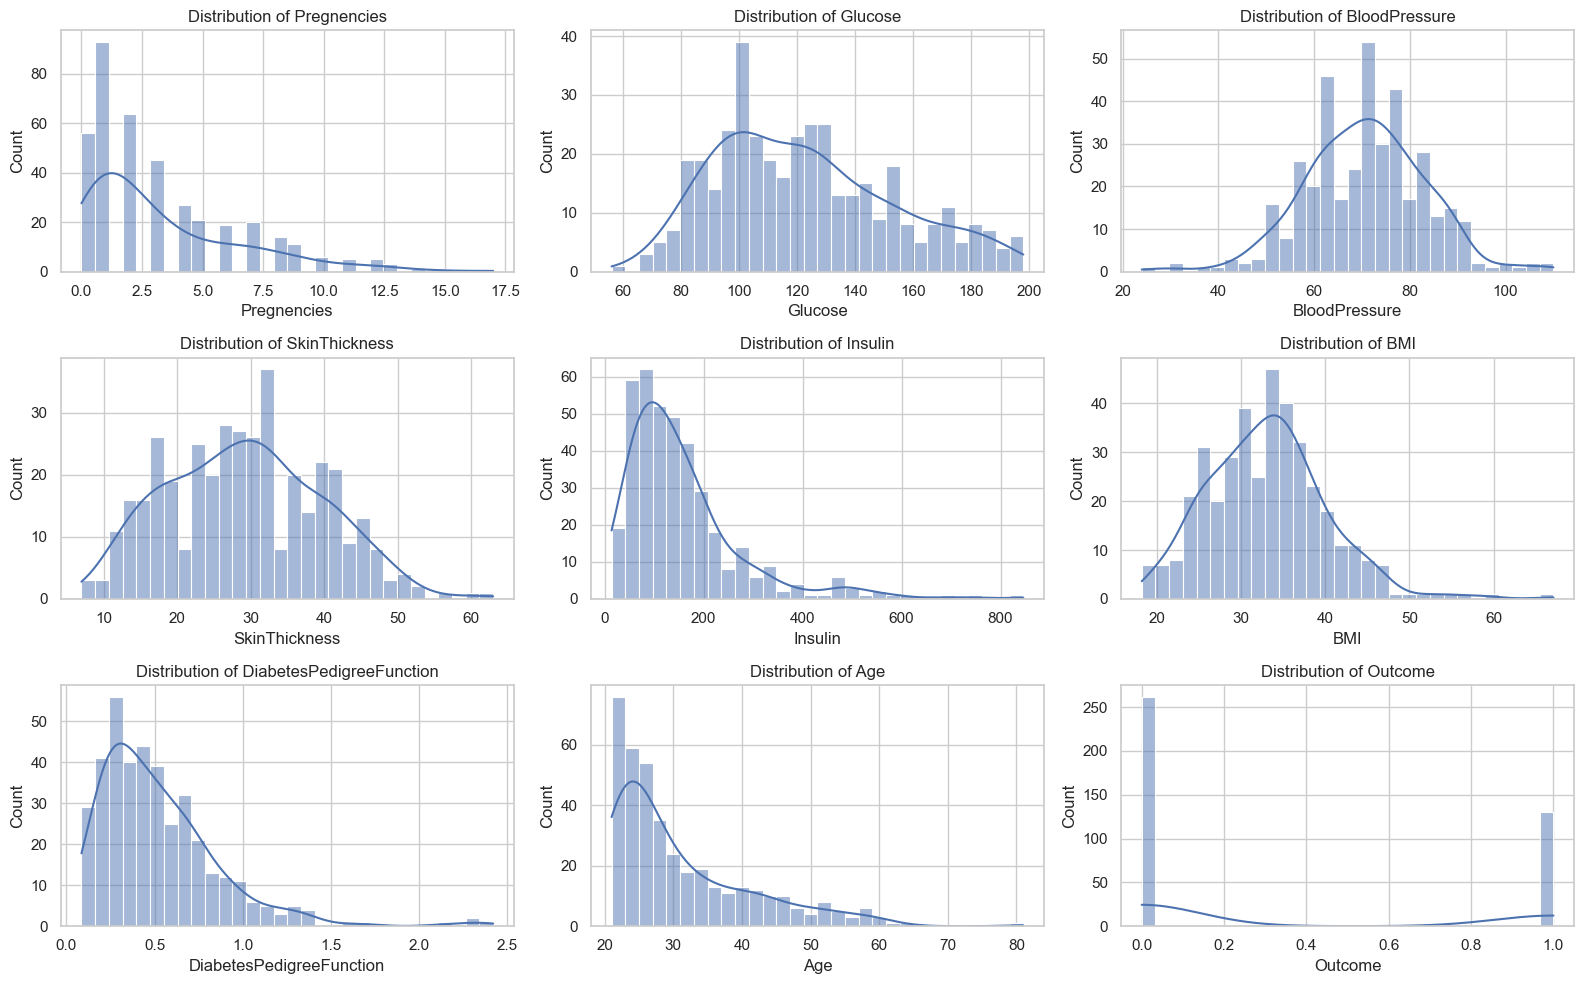

In [10]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values in specific columns with NaN (Not a Number)
df[columns_with_zeros] = df[columns_with_zeros].replace(0, pd.NA)

# Drop rows with missing data (NaN) in any of these columns
data_cleaned = df.dropna(subset=columns_with_zeros)

# Convert all columns to numeric in case of any non-numeric values
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')


sns.set(style="whitegrid")

#  Distribution of all features (histograms)
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
df[columns_with_zeros] = df[columns_with_zeros].replace(pd.NA, 0)


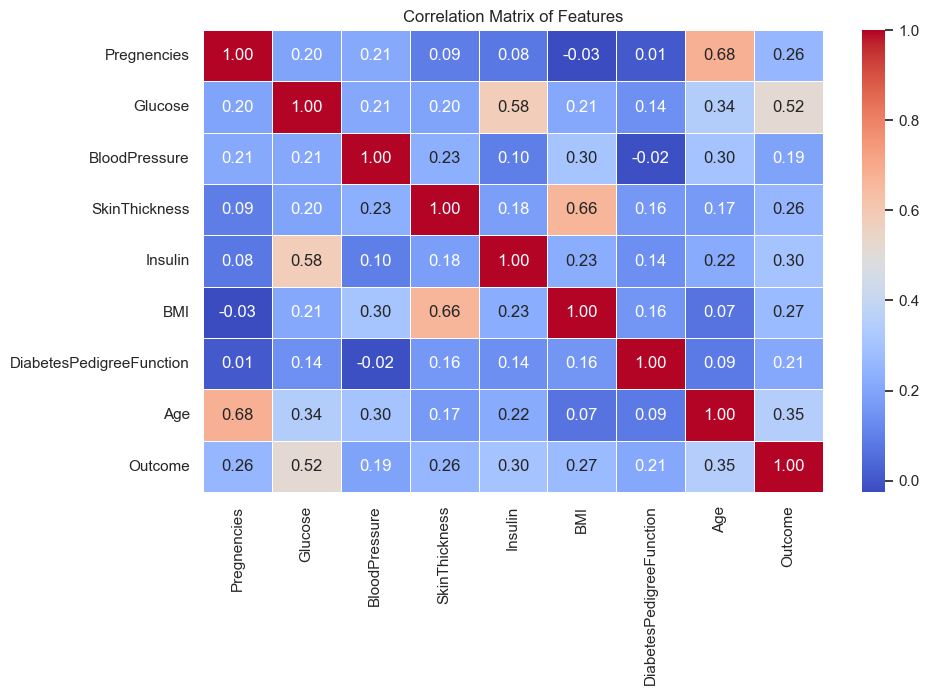

In [11]:
plt.figure(figsize=(10, 6))
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

<h1>DATA PREPROCESSING</h1>

In [12]:
dataset_new = df
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [13]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [14]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnencies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


<h1>FEATURE AND TARGET SEPARATION</h1>

In [15]:
X = dataset_new.drop(["Outcome","Pregnencies","DiabetesPedigreeFunction"],axis=1)
y = dataset_new["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) 

<h1>MODEL TRAINING</h1>

In [16]:
# Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [17]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)

In [18]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)
Y_pred_ran = ranfor.predict(X_test)

In [19]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)
Y_pred_dec = dectree.predict(X_test)

<h1>MODEL EVALUATION</h1>

In [20]:
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test,predictions)
acc_knn = accuracy_score(y_test,Y_pred_knn)
acc_ran = accuracy_score(y_test,Y_pred_ran)
acc_dec = accuracy_score(y_test,Y_pred_dec)
print("logistic regression: " + str(acc_log  *100))
print("k nearest neighbors: " + str(acc_knn *100))
print("Random forest: " + str(acc_ran * 100))
print("Decision Tree: " +str(acc_dec *100))

logistic regression: 80.08658008658008
k nearest neighbors: 71.86147186147186
Random forest: 72.72727272727273
Decision Tree: 65.80086580086581


In [21]:
print("************Classification Report************\n")
print(classification_report(y_test, predictions))

print("***********Confusion Matrix***************")
cm = confusion_matrix(y_test, predictions)
print(cm)

************Classification Report************

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       148
           1       0.78      0.61      0.69        83

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231

***********Confusion Matrix***************
[[134  14]
 [ 32  51]]


<Axes: >

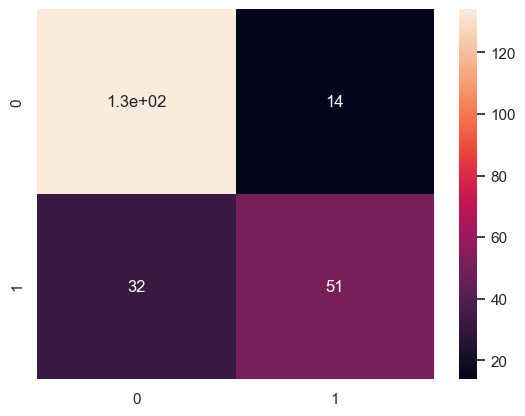

In [22]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

<h1>Observation</h1>
<p>Logistic regression have high accurancy score</p>

In [23]:
#save the model
import joblib 
joblib.dump(model, "E:/ML Project/diabetes_prediction/log_model.pkl")

['E:/ML Project/diabetes_prediction/log_model.pkl']